In [96]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Us_Ecommerce_Dataset을 이용한 EDA
- Us_Ecommerce 데이터를 활요하여 EDA를 수행하였습니다.

In [97]:
# 데이터 불러오기
df1 = pd.read_csv('./Us_Ecommerce_Dataset.csv')

## 전처리
### 결측치 제거

<AxesSubplot:>

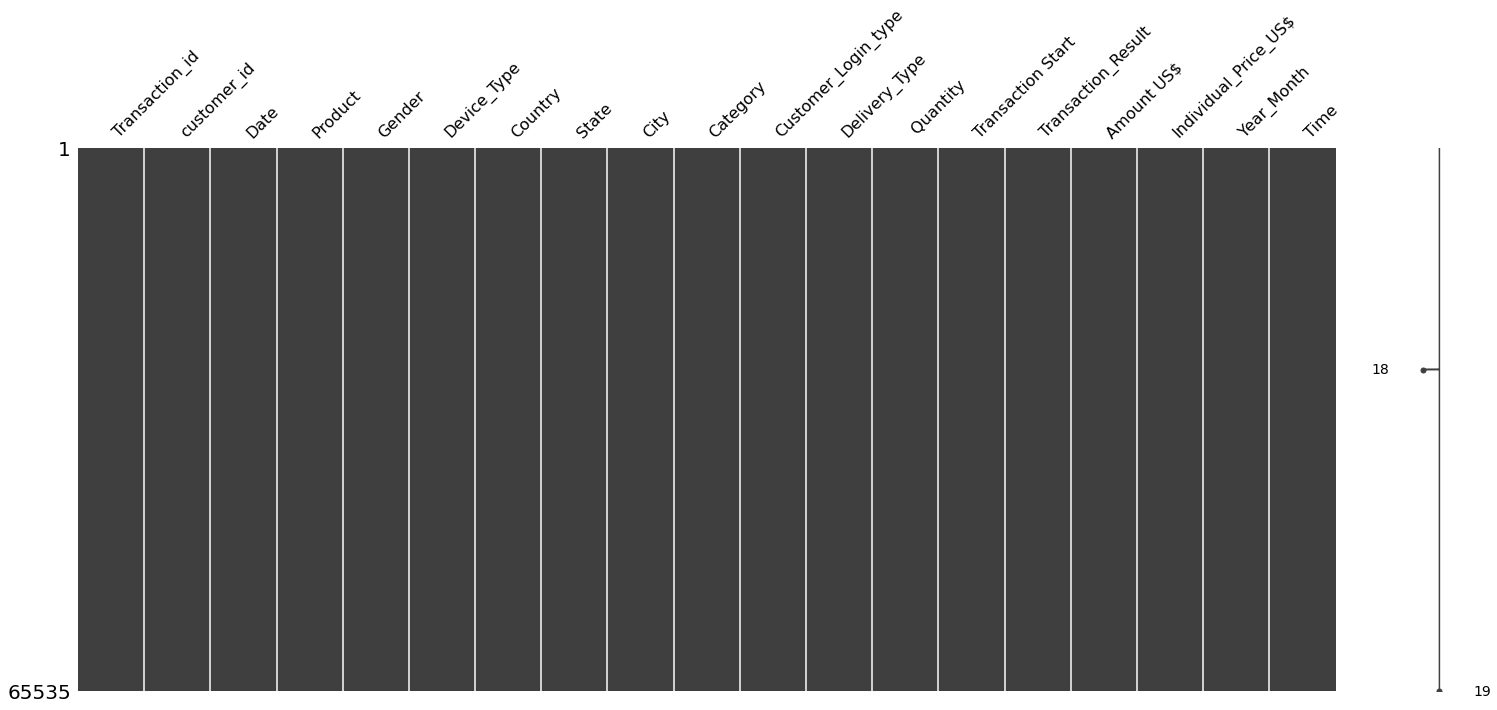

In [98]:
msno.matrix(df1)

In [99]:
df1.isnull().sum()

Transaction_id          0
customer_id             0
Date                    0
Product                 0
Gender                  0
Device_Type             0
Country                 0
State                   0
City                    0
Category                0
Customer_Login_type     0
Delivery_Type           0
 Quantity               0
Transaction Start       0
Transaction_Result      0
Amount US$              1
Individual_Price_US$    0
Year_Month              0
Time                    0
dtype: int64

In [1]:
df1.head()

NameError: name 'df1' is not defined

In [101]:
# 필요없는 칼럼 삭제
df1.pop('Transaction_Result')
df1.pop('Transaction Start')

0        1
1        1
2        1
3        1
4        1
        ..
65530    1
65531    1
65532    1
65533    1
65534    1
Name: Transaction Start, Length: 65535, dtype: int64

In [102]:
# 결측값있는 행 제거
df1.dropna(inplace=True)

<AxesSubplot:>

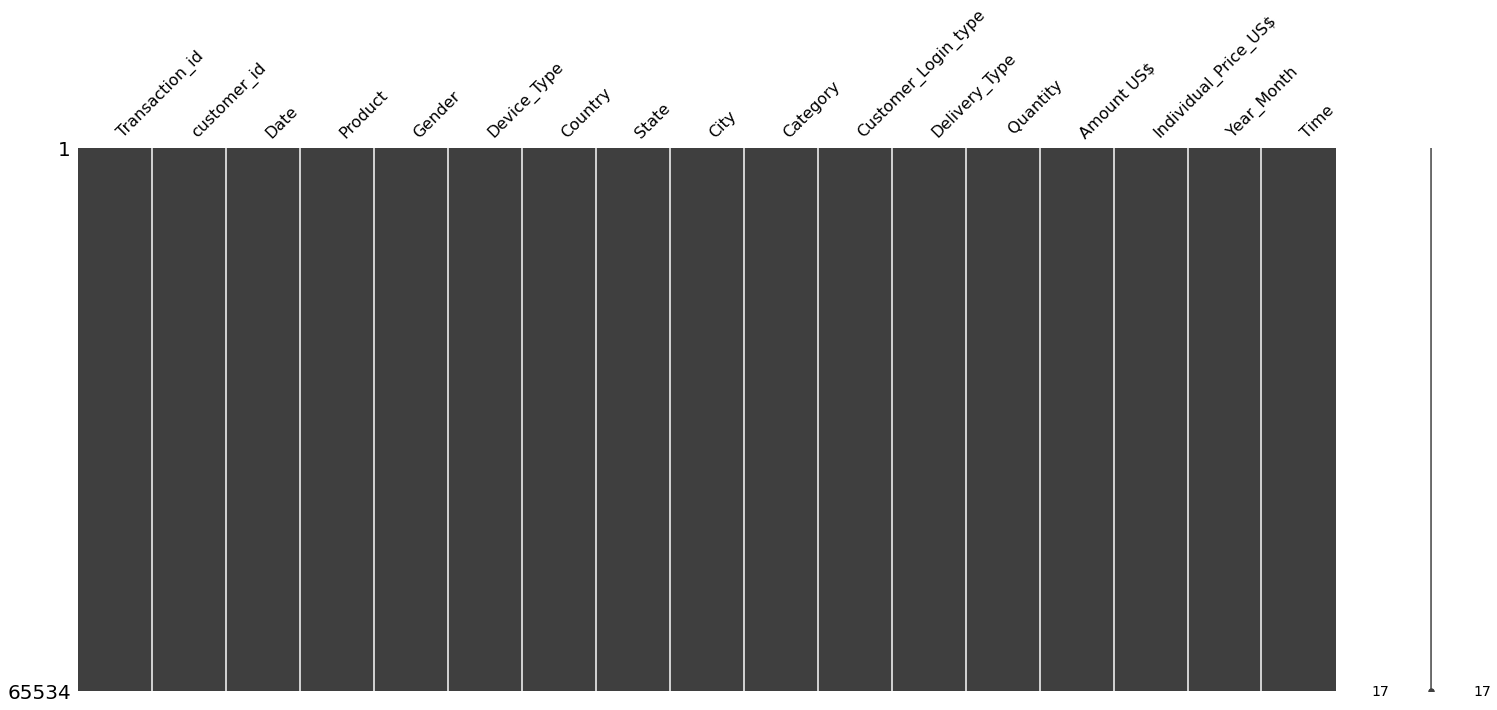

In [103]:
msno.matrix(df1)

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65534 entries, 0 to 65534
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Transaction_id        65534 non-null  int64 
 1   customer_id           65534 non-null  int64 
 2   Date                  65534 non-null  object
 3   Product               65534 non-null  object
 4   Gender                65534 non-null  object
 5   Device_Type           65534 non-null  object
 6   Country               65534 non-null  object
 7   State                 65534 non-null  object
 8   City                  65534 non-null  object
 9   Category              65534 non-null  object
 10  Customer_Login_type   65534 non-null  object
 11  Delivery_Type         65534 non-null  object
 12   Quantity             65534 non-null  int64 
 13  Amount US$            65534 non-null  object
 14  Individual_Price_US$  65534 non-null  object
 15  Year_Month            65534 non-null

### 이상값 제거

In [105]:
# 'Individual_Price_US$'가 ''#VALUE!' 인 row 보기
df1.loc[df1['Individual_Price_US$'] == '#VALUE!']

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Amount US$,Individual_Price_US$,Year_Month,Time
192,30382,1550737263,31/10/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,17,"1,61,850",#VALUE!,13-Oct,16:05:37
298,35816,1225531606,09/11/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,13,"1,26,834",#VALUE!,13-Nov,12:47:28
508,45944,2236204604,22/11/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,20,"1,33,934",#VALUE!,13-Nov,20:28:15
946,68232,1608443721,14/12/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,20,"1,60,000",#VALUE!,13-Dec,09:07:10
1148,79559,1902455585,26/12/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,21,"1,22,900",#VALUE!,13-Dec,18:16:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64264,39380,1216069884,13/11/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,19,"1,17,775",#VALUE!,13-Nov,11:06:13
64456,43484,1800956770,19/11/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,12,"3,58,500",#VALUE!,13-Nov,14:56:39
64828,50814,1543861731,29/11/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,18,"3,46,471",#VALUE!,13-Nov,14:11:49
65078,55380,1707492787,02/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,one-day deliver,13,"2,06,439",#VALUE!,13-Dec,18:21:32


In [106]:
# 칼럼 네임 잘못된 것 수정 (앞뒤로 띄어쓰기)
df1.rename({' Quantity ' : 'Quantity'}, axis = 1, (inplace=True))

In [31]:
# 'Amount US$'값 내에 'a,'를 삭제 후 type을 str에서 int로 변환
df1['Amount US$'] = df1['Amount US$'].str.replace(',', '').astype(int)

AttributeError: Can only use .str accessor with string values!

In [134]:
# '
idx = df1['Individual_Price_US$'][df1['Individual_Price_US$'] == '#VALUE!'].index
                                  
# '#VALUE!'값을 "Amount US$" / "Quantity" 로 대체하기 위해 계산한 값은 'data1'에 저장
data1 = np.round(df1['Amount US$'] / df1['Quantity']).astype(int)

In [110]:
# '#VALUE!'값 수정
df1['Individual_Price_US$'][df1['Individual_Price_US$'] == "#VALUE!"] = data1[idx]

C:\Users\user\AppData\Local\Temp\ipykernel_11056\2246635258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Individual_Price_US$'][df1['Individual_Price_US$'] == "#VALUE!"] = data1[idx]


In [111]:
df1[df1["Individual_Price_US$"] == "#VALUE!"]

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Amount US$,Individual_Price_US$,Year_Month,Time


In [30]:
# Individual_Price_US$' 값 내에 ','를 삭제 후 type을 str에서 float로 변환
df1['Individual_Price_US$'] = df1['Individual_Price_US$'].str.replace(',', '').astype(float)

ValueError: could not convert string to float: '#VALUE!'

In [113]:
df1.loc[(df1['Amount US$'] == 0 ) & (df1['Ird'] == 0)]

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Amount US$,Individual_Price_US$,Year_Month,Time
7,20737,1183410853,16/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,one-day deliver,14,0,0.0,13-Oct,19:17:39
12,26498,1623523846,25/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,one-day deliver,20,0,0.0,13-Oct,13:48:08
13,28225,1456549032,28/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,0,0.0,13-Oct,08:09:10
37,51054,1708562250,29/11/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,one-day deliver,20,0,0.0,13-Nov,19:34:58
50,17949,2217960309,10/10/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,17,0,0.0,13-Oct,23:07:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65492,66267,2039607099,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,17,0,0.0,13-Dec,10:35:12
65496,66400,2002501295,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,22,0,0.0,13-Dec,09:29:17
65512,66659,2143205992,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,22,0,0.0,13-Dec,12:42:36
65519,66767,1471431078,13/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,17,0,0.0,13-Dec,20:03:52


In [114]:
# 'Amount US$' 와 'Individual_Price_US$' 가 0인 인덱스 값을 리스트로 만들기
a = df1[(df1['Amount US$'] == 0 ) & (df1['Individual_Price_US$'] == 0)].index

# a 행렬 모두 제거
df1.drop(a, axis=0, inplace=True)

### 파생변수 생성

In [115]:
import datetime

In [116]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df1['Time'] = pd.to_datetime(df1['Time'])

In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57905 entries, 0 to 65534
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Transaction_id        57905 non-null  int64         
 1   customer_id           57905 non-null  int64         
 2   Date                  57905 non-null  datetime64[ns]
 3   Product               57905 non-null  object        
 4   Gender                57905 non-null  object        
 5   Device_Type           57905 non-null  object        
 6   Country               57905 non-null  object        
 7   State                 57905 non-null  object        
 8   City                  57905 non-null  object        
 9   Category              57905 non-null  object        
 10  Customer_Login_type   57905 non-null  object        
 11  Delivery_Type         57905 non-null  object        
 12  Quantity              57905 non-null  int64         
 13  Amount US$      

In [118]:
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
df1['Hour'] = df1['Time'].dt.hour
df1['Weekday_name'] = df1['Date'].dt.day_name()

In [119]:
df1.head(2)

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,...,Delivery_Type,Quantity,Amount US$,Individual_Price_US$,Year_Month,Time,Month,Year,Hour,Weekday_name
0,40170,1348959766,2013-11-14,Hair Band,Female,Web,United States,New York,New York City,Accessories,...,one-day deliver,12,6910,576.0,13-Nov,2022-09-30 22:35:51,11,2013,22,Thursday
1,33374,2213674919,2013-11-05,Hair Band,Female,Web,United States,California,Los Angles,Accessories,...,one-day deliver,17,1699,100.0,13-Nov,2022-09-30 06:44:41,11,2013,6,Tuesday


## 시각화
### 성별 거래건수

In [34]:
sns.set_palette("Set3")

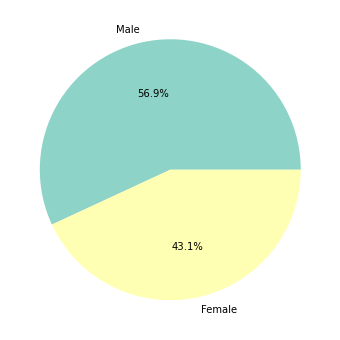

In [35]:
counts = df1['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts.values, labels=counts.index, autopct='%.1f%%')
plt.show()

- 남성이 여성보다 더 많은 상품을 구매함

### 거래 건수 top8의 Product

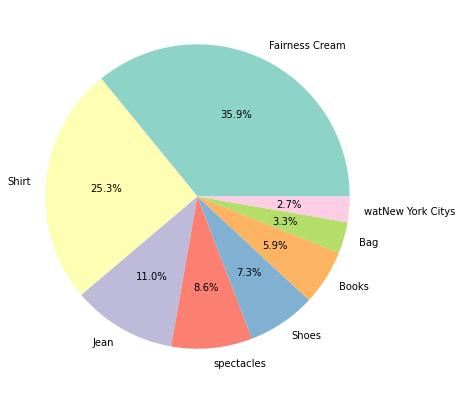

In [122]:
df4 = df1['Product'].value_counts()
df4 = df4.reset_index().loc[:7].rename(columns={"index": "Product", "Product": "Count"})

plt.figure(figsize=(7, 7))
plt.pie(df4["Count"].values, labels=df4["Product"].values, autopct="%1.1f%%")
plt.show()

### 시간별 매출

In [36]:
df2 = df1.groupby('Hour').sum().sort_values('Hour') 
df2 = df2.reset_index().rename(columns={'index':'Hour'})
df2[['Hour', 'Amount US$']]

KeyError: 'Hour'

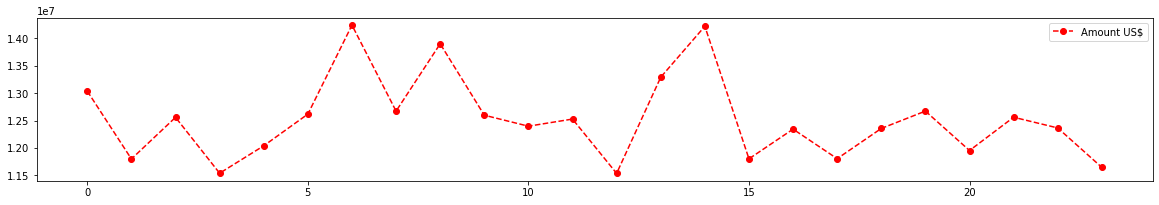

In [90]:
plt.figure(figsize=(20, 3))
plt.plot(df2['Hour'], df2['Amount US$'], "ro--", label="Amount US$")
plt.legend()
plt.show()

- 6시, 8시, 14시에 가장 많은 매출 현황을 보임

### 시간별 거래 건수

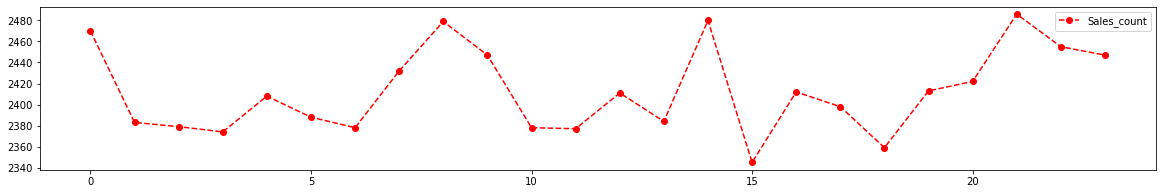

In [91]:
df3 = df1.groupby('Hour').count().sort_values('Hour') 
df3 = df3.reset_index().rename(columns={'index':'Hour'})

plt.figure(figsize=(20, 3))
plt.plot(df3['Hour'], df3['Amount US$'], "ro--", label="Sales_count")
plt.legend()
plt.show()

- 8시, 9시, 14시에 가장 많은 매출 현황을 보임
- 6시에 비싼 물건을 구입한 데이터가 있음. 

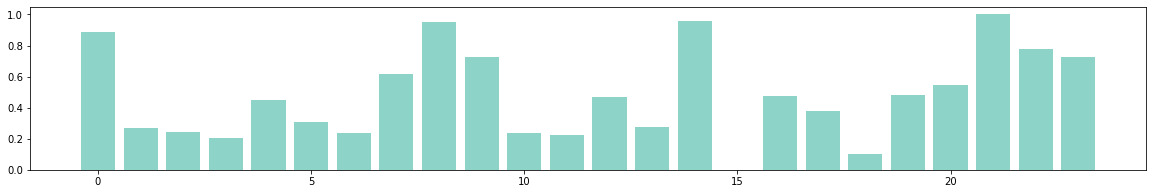

In [92]:
from sklearn.preprocessing import minmax_scale
plt.figure(figsize=(20, 3))
plt.bar(df3['Hour'], minmax_scale(df3['Amount US$']))
plt.show()

### 월별 거래 빈도

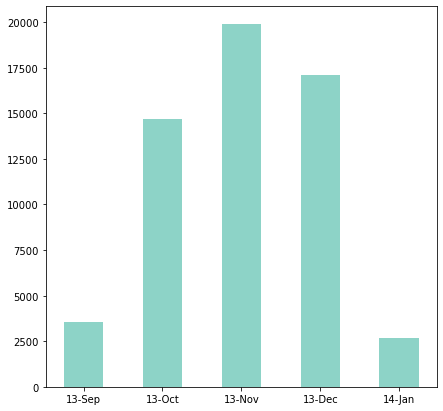

In [93]:
df6 = df1.groupby(['Year_Month']).count().reindex(index=['13-Sep', '13-Oct', '13-Nov', '13-Dec', '14-Jan'])
df1['Date']
plt.figure(figsize=(7, 7))
plt.bar(df6['Date'].index, df6['Date'].values, width=0.5)
plt.show()

### 도시 별 구매 건수

In [94]:
df5 = df1['State'].value_counts()
df5 = df5.reset_index().rename(columns={'index':'State', 'State':'Count'})

,State,Count
0,Washington,35173
1,California,20233
2,New York,2499


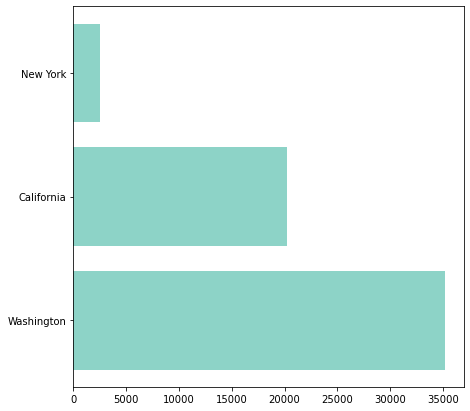

In [95]:
plt.figure(figsize=(7, 7))
plt.barh(df5['State'], df5['Count'])
plt.show()